# SBTools Bootcamp BioCRNpyler Lecture : 2

## Non-mass action propensities in BioCRNpyler
### _Ayush Pandey_

# Reduced model representations

## Time-Scale Separation

* **QSSA : Quasi steady-state approximation**. In a dynamic model, if a species exhibits a different intrinsic time scale and tends to reach an equilibrium state quicker than others, then we approximate such a species by its quasi steady state. For example, in the above example, if the binding and unbinding reaction of the transcript with the RNAP are fast, we can assume that the complex $C_1$ is at QSS. We can then write,
\begin{align}
\frac{dC_1}{dt} = 0
\end{align}
On solving the above, we get an algebraic relationship for $C_1$ as function of other species that we can substitute into all other equations to eliminate $C_1$ dynamics from the model.
* Formally, singular perturbation theory is a mathematical tool to derive QSSA conditions and steady state expressions. For a rigorous mathematical treatment of time-scale separation as applied to biological systems, refer to Chapter 3 of [[1]](http://www.cds.caltech.edu/~murray/books/AM08/pdf/bfs-dynamics_14Sep14.pdf) and for more information on singular perturbation theory refer to [[2]](https://books.google.com/books/about/Nonlinear_Systems.html?id=t_d1QgAACAAJ)

[1]: Del Vecchio, Domitilla, and Richard M. Murray. Biomolecular Feedback Systems. Princeton, NJ: Princeton University Press, 2015.

[2]: Khalil, Hassan K., and Jessy W. Grizzle. Nonlinear Systems. Vol. 3. Upper Saddle River, NJ: Prentice hall, 2002.

## Conservation Laws

If a species in a model is conserved in amount, but undergoes chemical reactions, we can write a conservation law that relates the total amount of that species with the various amounts in which that species is present in the system. We can use these conservation laws to eliminate redundant dynamics from our system models. We will demonstrate these techniques using a simple example.

## A Simple Example: An Enzymatic Reaction System
\begin{align}
    E + S &\underset{d}{\overset{a}\rightleftharpoons} C \xrightarrow{k} P + E 
\end{align}
Here, $C$ is the complex formed when the enzyme (E) binds to the substrate (S). P is the product resulting from the modification of the substrate S due to the binding with the enzyme E. Refer to [1] for more information.
The full mass-action kinetics based model with four species is given by:
\begin{align*}
\frac{dS}{dt} &= -aES + dC \\
\frac{dC}{dt} &= aES - (d+k) C\\
\frac{dE}{dt} &= -a ES + dC + kC \\
\frac{dP}{dt} &= kC
\end{align*}

The total enzyme concentration is usually assumed to be constant. Hence, we get the following **conservation law**:
\begin{align}
E + C = E_{tot}
\end{align}
We can eliminate E from the system dynamics by substituting $E = E_{tot} - C$. 

**Time-Scale Separation Assumption**:


Next, we assume that the binding and unbinding reactions are at a faster time-scale than the catalysis reaction. Hence, we assume QSSA for C:
\begin{align}
\frac{dC}{dt} &= 0 \Rightarrow a(E_{tot} − C)S − (d+k)C = 0\\
\Rightarrow C &= \frac{E_{tot} S }{S+ K_m}, \quad K_m = \frac{d + k}{a}\\
\\
\end{align}


The reduced model then becomes:
\begin{align}
\frac{dP}{dt} &= rate . \frac{S}{S+ K_m} = rate . \frac{S_{tot} - P}{S_{tot} - P + K_m}\\
\\
\end{align}


This is a positive hill function with $n = 1$, $K = K_m$, and rate$ = k E_{tot}$.
The mathematical conditions on the parameters under which this assumption is justified are discussed in [1]. 


[1]: Del Vecchio, Domitilla, and Richard M. Murray. Biomolecular Feedback Systems. Princeton, NJ: Princeton University Press, 2015

**All other kinds of Hill functions can be derived in a similar fashion.**


**Here is a list of the Hill function propensities available in BioCRNpyler:**

1. Positive Hill 
\begin{align}
rate \times \frac{X^n}{K^n + X^n}\\
\\
\end{align}

1. Negative Hill 
\begin{align}
rate \times \frac{K^n}{K^n + X^n}\\
\\
\end{align}




1. Positive Proportional Hill 
\begin{align}
rate \times d \times \frac{X^n}{K^n + X^n}\\
\\
\end{align}

1. Negative Proportional Hill 
\begin{align}
rate \times d \times \frac{K^n}{K^n + X^n}\\
\\
\end{align}

Here $X$ and $d$ are species identifiers and $K$ and $rate$ are parameters. Detailed description of supported non-massaction propensities is available [here](https://github.com/ananswam/bioscrape/wiki/Propensities).

An [interactive tool](https://www.physiologyweb.com/calculators/hill_equation_interactive_graph.html) online to practice your Hill functions!


# A simple Hill function model example

Consider the following toy model:
1. $\varnothing \xrightarrow[]{\rho(S)} X$; 
\begin{align} 
\rho(S) = K_{X}\frac{S^{2}}{K_{S}^{2}+S^{2}}
\\
\end{align}
2. $X \xrightarrow[]{\delta} \varnothing$; massaction kinetics at rate $\delta$.

## Syntax: 

```python
params_dict = {"s1":species reference, "K":Hill activation parameter, "n": Hill coefficient}
reaction = Reaction(list_of_inputs, list_of_outputs, 
                    k = rate_parameter, propensity_type = 'hillpositive',
                    propensity_params = params_dict)
```

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
import numpy as np
import pylab as plt

In [2]:
from biocrnpyler.chemical_reaction_network import Species, Reaction, ChemicalReactionNetwork
delta = 0.1 
K_X = 5
K_S = 20
S = Species(name = "S")
X = Species(name = "X", material_type = "protein")
rxn1 = Reaction([], [X], k = K_X, 
                propensity_type = "hillpositive", 
                propensity_params = {"s1":str(S), "K":K_S, "n":2})

rxn2 = Reaction([X], [], k = delta)
CRN_toy_model = ChemicalReactionNetwork(species = [S,X], reactions = [rxn1, rxn2])
#Species, reactions, and CRNs can all be directly printed
print('CRN for the toy model with non-massaction propensities:\n',CRN_toy_model)

CRN for the toy model with non-massaction propensities:
 Species = S, protein_X
Reactions = [
	 --> protein_X        hillpositive: k('S')=5*'S'^2/(20+'S'^2)
	protein_X -->         massaction: k_f(protein_X)=0.1*protein_X
]


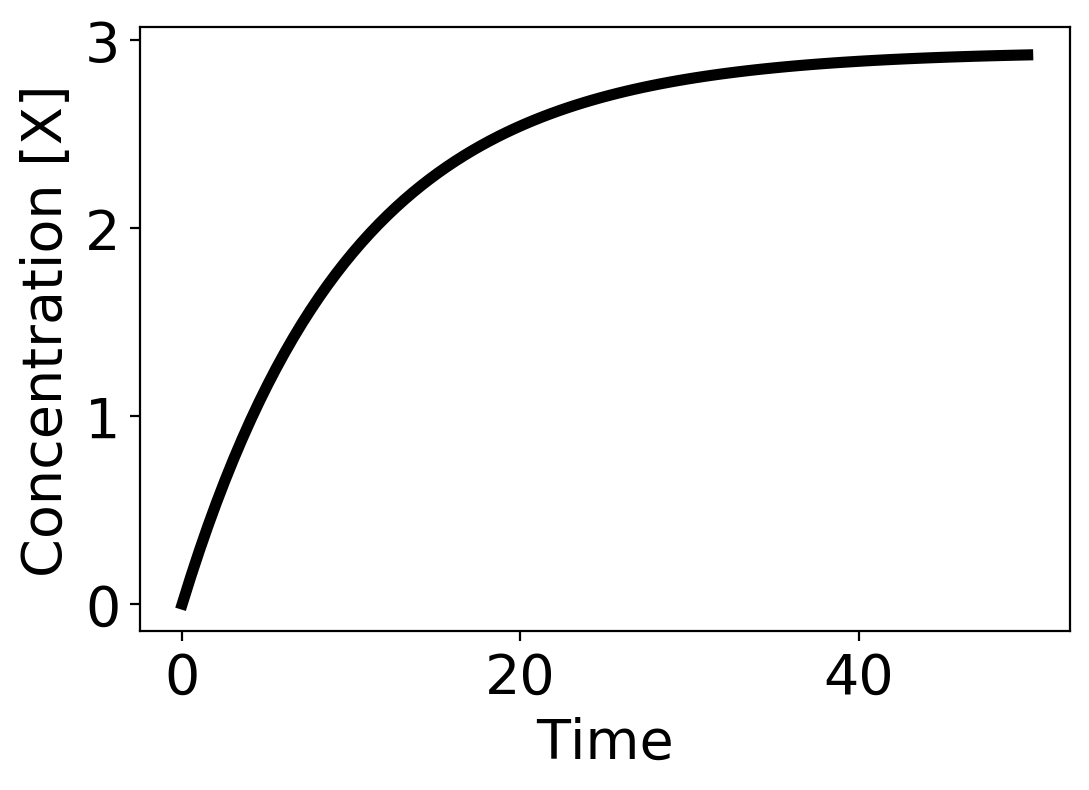

In [3]:
timepoints = np.linspace(0, 50, 100)
plt.figure()
R = CRN_toy_model.simulate_with_bioscrape(timepoints = timepoints, initial_condition_dict = {str(S):5})
plt.plot(timepoints, R[str(X)], color = 'black', lw = 4)
plt.xlabel("Time")
plt.ylabel("Concentration [X]");
plt.show()

## Enzymatic reaction system in BioCRNpyler: 
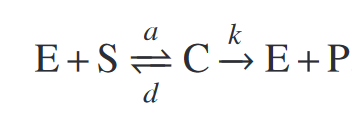

## Full dynamics (mass-action): 
* full dynamics (with mass-action propensities)
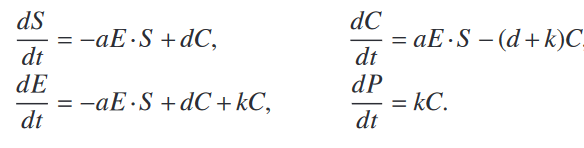

## Reduced order model: 

* reduced dynamics (with a Hill function). 
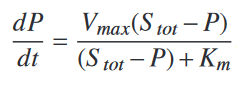

## General propensity example: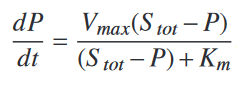

In [1]:
from biocrnpyler.chemical_reaction_network import Species, Reaction, ChemicalReactionNetwork

#Create a list of species names (strings)
P = Species(name = "P", material_type = 'protein')
species = [P]
#create the parameters variables
Km1 = 0.01
rate_Vm = 1
S_tot = 1
rate_string = "(" + str(S_tot) + "-" + str(P) + ")/(" + str(S_tot) + "-" +str(P) + "+" + str(Km1) + ")"
rxn = Reaction([], [P], k = rate_Vm,
               propensity_type = "general", 
               propensity_params = {"rate": rate_string })
#Notice that parameters can also take numerical values instead of being named directly
CRN1 = ChemicalReactionNetwork(species = species, reactions = [rxn])
#Species, reactions, and CRNs can all be directly printed
print('Reduced model for enzymatic reaction system:\n',CRN1)

Reduced model for enzymatic reaction system:
 Species = protein_P
Reactions = [
	 --> protein_P        general: k(x)=1*(1-protein_P)/(1-protein_P+0.01)
]


In [5]:
Km2 = 0.5
rate_string2 = "(" + str(S_tot) + "-" + str(P) + ")/(" + str(S_tot) + "-" +str(P) + "+" + str(Km2) + ")"
rxn2 = Reaction([], [P], k = rate_Vm,
               propensity_type = "general", 
               propensity_params = {"rate": rate_string2 })
CRN2 = ChemicalReactionNetwork(species = species, reactions = [rxn2])

Km3 = 1
rate_string3 = "(" + str(S_tot) + "-" + str(P) + ")/(" + str(S_tot) + "-" +str(P) + "+" + str(Km3) + ")"
rxn3 = Reaction([], [P], k = rate_Vm,
               propensity_type = "general", 
               propensity_params = {"rate": rate_string3})
CRN3 = ChemicalReactionNetwork(species = species, reactions = [rxn3])
timepoints = np.linspace(0, 10, 100)

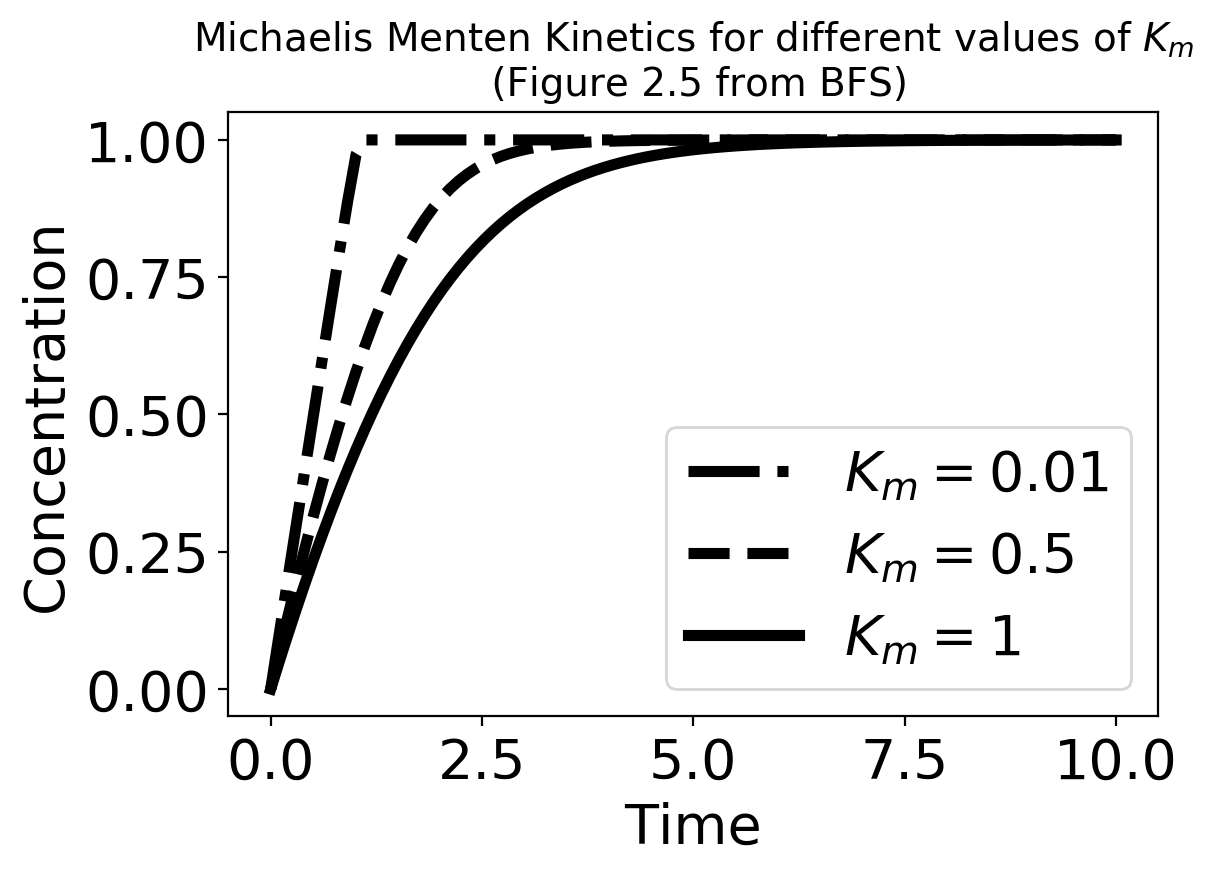

In [6]:
plt.figure()
R1 = CRN1.simulate_with_bioscrape(timepoints = timepoints, initial_condition_dict = {str(P):0})
R2 = CRN2.simulate_with_bioscrape(timepoints = timepoints, initial_condition_dict = {str(P):0})
R3 = CRN3.simulate_with_bioscrape(timepoints = timepoints, initial_condition_dict = {str(P):0})
plt.plot(timepoints, R1[str(P)],'-.', color = 'black', lw = 4, label = '$K_m = '+str(Km1)+'$')
plt.plot(timepoints, R2[str(P)],'--', color = 'black', lw = 4, label = '$K_m = '+str(Km2)+'$')
plt.plot(timepoints, R3[str(P)], color = 'black', lw = 4, label = '$K_m = '+str(Km3)+'$')
plt.legend()
plt.title('Michaelis Menten Kinetics for different values of $K_m$\n (Figure 2.5 from BFS)', fontsize = 14)
plt.xlabel("Time")
plt.ylabel("Concentration");
plt.show()

### Exercises:

1. (Beginner) For the enzymatic reaction system compare the results for the reduced and the full model and find the parameter regime in which the reduced model works. Solution available in Chapter 3 of [1].

>one with mass action and one with hill function

2. (Intermediate) For the repressilator model in [[2](https://www.nature.com/articles/35002125)], write a BioCRNpyler model (with 3 states) using non-massaction propensities. Study the oscillatory nature for different parameter values. 

3. (Advanced - Developer) On your BioCRNpyler fork, add a new propensity type in the Reaction class. Demonstrate the use case in a jupyter notebook and create a pull request to BuildACell/BioCRNpyler. Possible examples of new propensity types could be a positive-negative Hill function, proportional-positive-negative Hill function and so on...


[1]: Del Vecchio, Domitilla, and Richard M. Murray. Biomolecular Feedback Systems. Princeton, NJ: Princeton University Press, 2015

[2]: Elowitz, Michael B., and Stanislas Leibler. "A synthetic oscillatory network of transcriptional regulators." Nature 403.6767 (2000): 335-338.